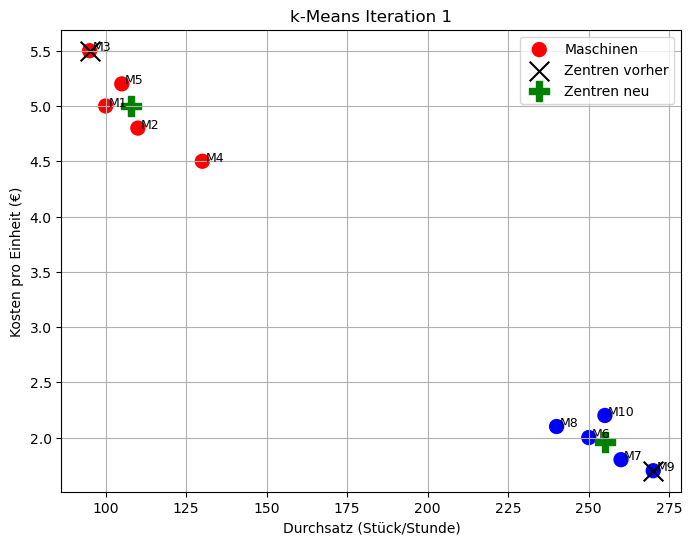

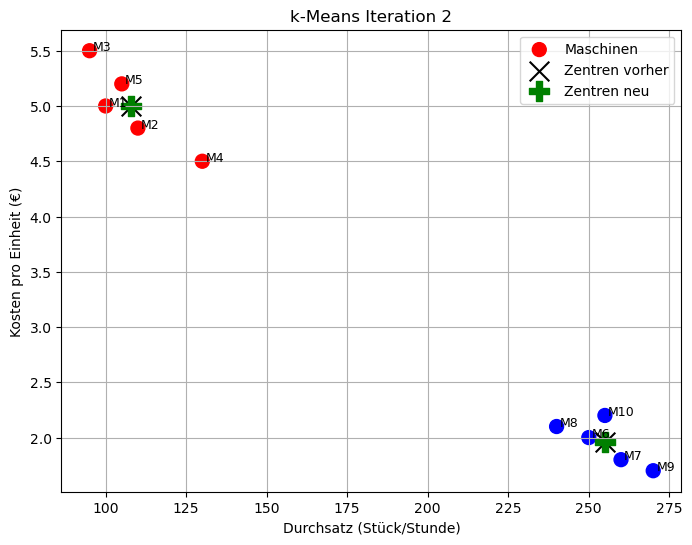

Maschine 1: Durchsatz=100, Kosten=5.0 → Cluster 0
Maschine 2: Durchsatz=110, Kosten=4.8 → Cluster 0
Maschine 3: Durchsatz=95, Kosten=5.5 → Cluster 0
Maschine 4: Durchsatz=130, Kosten=4.5 → Cluster 0
Maschine 5: Durchsatz=105, Kosten=5.2 → Cluster 0
Maschine 6: Durchsatz=250, Kosten=2.0 → Cluster 1
Maschine 7: Durchsatz=260, Kosten=1.8 → Cluster 1
Maschine 8: Durchsatz=240, Kosten=2.1 → Cluster 1
Maschine 9: Durchsatz=270, Kosten=1.7 → Cluster 1
Maschine 10: Durchsatz=255, Kosten=2.2 → Cluster 1


In [9]:
import numpy as np  # Für numerische Operationen
import matplotlib.pyplot as plt  # Für Visualisierung

# ---------------------------- Datensimulation: Fabrikleistung ----------------------------
# Wir simulieren 10 Produktionsanlagen mit zwei Metriken:
# - Durchsatz (Stück pro Stunde)
# - Kosten pro Einheit (Euro)

np.random.seed(0)  # Für Reproduzierbarkeit

durchsatz = np.array([100, 110, 95, 130, 105, 250, 260, 240, 270, 255])  # Simulierter Durchsatz
kosten = np.array([5.0, 4.8, 5.5, 4.5, 5.2, 2.0, 1.8, 2.1, 1.7, 2.2])     # Simulierte Stückkosten

# Kombinieren der Daten in ein zweidimensionales Array (10x2)
data = np.column_stack((durchsatz, kosten))

# ---------------------------- Hilfsfunktionen ----------------------------

def compute_distances(data, centroids):
    """Berechnet die euklidische Distanz jedes Punktes zu allen Zentren."""
    distances = np.zeros((data.shape[0], len(centroids)))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(data - centroid, axis=1)
    return distances

def plot_iteration(data, centroids, labels, new_centroids, iteration):
    """Visualisiert einen k-Means-Schritt."""
    colors = ['red' if label == 0 else 'blue' for label in labels]

    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=colors, s=100, label='Maschinen')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label='Zentren vorher')
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='green', marker='P', s=200, label='Zentren neu')

    for i, (x, y) in enumerate(data):
        plt.text(x + 1, y, f"M{i+1}", fontsize=9)

    plt.title(f"k-Means Iteration {iteration}")
    plt.xlabel("Durchsatz (Stück/Stunde)")
    plt.ylabel("Kosten pro Einheit (€)")
    plt.legend()
    plt.grid(True)
    plt.show()

# ---------------------------- k-Means mit Visualisierung jeder Iteration ----------------------------
# Prüfungs
def k_means_step_by_step(data, k=2, max_iter=10):
    """Führt k-Means durch und visualisiert jede Iteration."""
    # Zufällige Initialisierung
    centroids = data[np.random.choice(len(data), k, replace=False)]

    for iteration in range(1, max_iter + 1):
        # Schritt 1: Distanzen berechnen und Clusterzuweisung
        distances = compute_distances(data, centroids)
        labels = np.argmin(distances, axis=1)

        # Schritt 2: Zentren aktualisieren
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Visualisierung dieser Iteration
        plot_iteration(data, centroids, labels, new_centroids, iteration)

        # Abbruchbedingung: Zentren haben sich nicht verändert
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# ---------------------------- Ausführung ----------------------------
labels, final_centroids = k_means_step_by_step(data, k=2)

# ---------------------------- Ausgabe der finalen Zuordnung ----------------------------
for i, (d, c, label) in enumerate(zip(durchsatz, kosten, labels)):
    print(f"Maschine {i+1}: Durchsatz={d}, Kosten={c} → Cluster {label}")